# Assignment

## Part 1 - Simple

Write a function that takes as input the following:

- another function (note that in Python you can pass functions as arguments to other functions)
- starting point
- temperature 
- learning/decay rate

and then proceeds to apply Simulated Annealing to minimize the function.  This is more or less the same as what has been given above, but you need to encapsulate it all into a simple function and demonstrate how it works on arbitrary functions.  

## Part 2 

Note that part 2 is also part of the regular assignment.  It is **not** optional, but is specified as a separate problem part to break the overall problem into portions in case you find this too hard to solve at one shot.  

The traveling salesman problem gives you a set of city locations (x, y coordinates).  Your goal is to find a route from a given starting point that visits all the cities exactly once and then returns to the origin, with the minimum total distance covered (distance is measured as Euclidean distance $\sqrt{(x_2-x_1)^2 + (y_2-y_1)^2}$).  

You will be given a file where the first line is the number of cities *N*, and the next *N* lines give the cities as a list of x, y coordinates: for example
```
4
0.0 1.5
2.3 6.1
4.2 1.3
2.1 4.5
```

Your goal is to give a sequence of numbers, for example `[0 3 2 1]` which specifies the order in which to visit the cities.  Note that after the last city you will come back to the first one in the list.  

Plot the cities with the path you have specified, and output the total length of the shortest path discovered so far.

## Report

You need to submit a .zip file that contains all your code (either notebook or plain Python files) and a PDF file (can be generated from the notebook) that clearly documents what you have implemented and how to run your code.  For part 1, you need to also show the output plot that shows how the search proceeded when run on the function given in the presentation.

# Part 1

In [29]:
# Set up imports
%matplotlib ipympl
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation


In this section of code we import all the necessary modules like numpy, matplotlib etc.

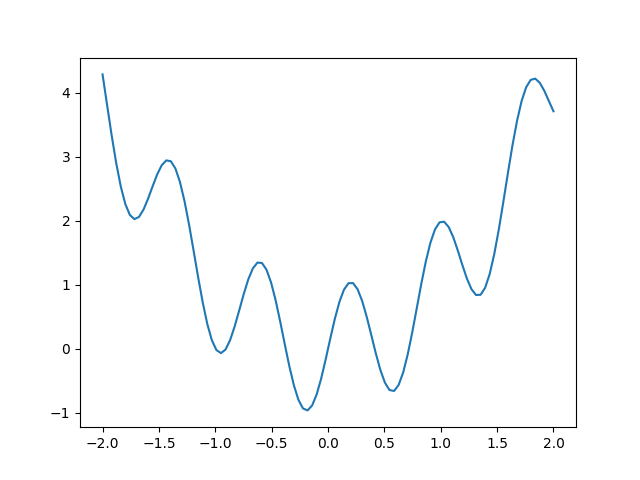

In [30]:
# Function with many minima
def yfunc(x):
    return x**2 + np.sin(8*x)

# plotting the given function
xbase = np.linspace(-2, 2, 100)
ybase = yfunc(xbase)
plt.plot(xbase, ybase)
plt.show()

In this section we define a function with many minima. We have to find the minimum of this function for which we will use annealing algorithm.
We take x_axis values using linspace function and by putting those value in the function we get y_axis values. Then we plot the function.

MovieWriter ffmpeg unavailable; using Pillow instead.


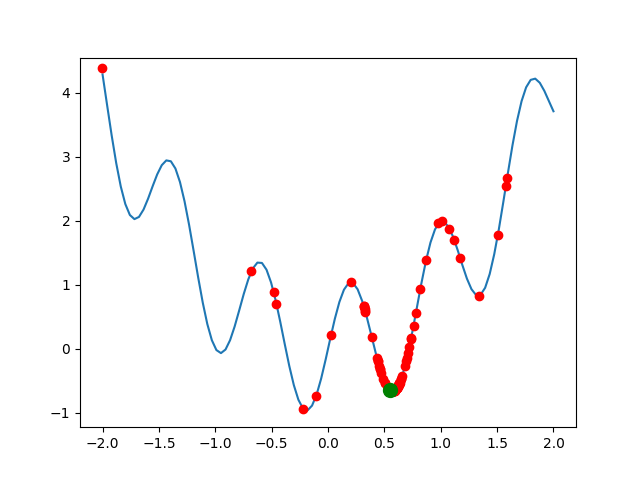

The minimum value is -0.649246186477573


In [35]:
def general_func( f, st_point, temp, d_rate):
    T = temp                  # Initial temperature
    decayrate = d_rate        # Initial decayrate
    
    # Set up some large value for the best cost found so far
    bestcost = 100000
    # setting the starting point
    bestx = st_point
    
     #setting the figure and axis for animation
    fig, ax = plt.subplots()
    ax.plot(xbase, ybase)
    xall, yall = [], []                              # making the empty list given to lnall and lngood                        
    lnall,  = ax.plot([], [], 'ro')                  # this gives the priviously encountered points with red dot
    lngood, = ax.plot([], [], 'go', markersize=10)   # this gives the new lowest point with green dot 
    
    # defining function which actully append the latest values of x and y and plot it
    def onestep(frame):
        nonlocal bestcost, bestx, decayrate, T
        # Generate a random value \in -2, +2
        dx = (np.random.random_sample() - 0.5) * T
        x = bestx + dx
        # print(f"Old x = {x}, delta = {dx}")
        y = yfunc(x)
        if y < bestcost:
            # print(f"Improved from {bestcost} at {bestx} to {y} at {x}")
            bestcost = y
            bestx = x
            lngood.set_data(x, y)
        else:
            toss = np.random.random_sample()
            if toss < np.exp(-(y-bestcost)/T):
                bestcost = y
                bestx = x
                lngood.set_data(x, y)
            # print(f"New cost {y} worse than best so far: {bestcost}")
            pass
        T = T * decayrate
        xall.append(x)
        yall.append(y)
        lnall.set_data(xall, yall)
        # return lngood,

    ani= FuncAnimation(fig, onestep, frames=range(100), interval=100, repeat=False)
    ani.save('week7_1.gif') 
    plt.show()
    
    for i in range(1000):
        k = bestx
    print(f"The minimum value is {f(k)}")

general_func( yfunc, -2, 3.0, 0.95)

Here we make a general function which takes any one variable function as input along with the 'decaying rate', 'temperature' and 'starting point' for annealing algorithm. It plots an animated graph which gives us the minimum value.

Annealing is the algorithm where we find the optimum value of a function. Here first we allow to move the point randomly all over the graph and explore more maxima and minima and when 'temperature' decreases the search of minima becomes more slow and specific. And we get the corresponding local minima. At the beginning the search is very random so there is very high probability of getting global minima using this algorithm.

Here we first give the function, temperature, starting point and decayrate as argument to the general function. We first find the probability of expression which depends on temperature. At high temperature the probability is high and at low temperature the probability is low. 

We take the best x value so that the function settles down at the absolute minimum. Then we set the figure and axis for plotting. We make two empty list, to which the latest x and y values are to be appended. Then we plot the recent minimum point with green dot,and in the next frame when we get new lowest point we represent it with green dot and the previous lowest point with red dot.

Then we find the value of the function at the given starting point value, and compares it with a large value mentioned earlier. If new y value is smaller than the large value then change the y value is placed as new large value. Otherwise we compare the probalility of with a randomly generated sample and if the probability is high enough then we take the large y value as also new y value because at the beginning when probability is high, we search in a large domain of graph.

Then we change the temperature value by multiplying it with the decay rate and again check the above steps.

We see that later when the temperature values decreased the animation settles at a local minimum with the high probability that the local minimum is the global minimum.
We plot the animation at last

#### Observation
We see that initially the red dots spread all over the graph exploring the whole graph. And as temperature value decreases the animation settles at nearest local minimum with high probability of being it the global minimum. 
Now the graph settles at the global minimum, confirmed from the graph and the global minimum value is -0.9539404866325465

# Part 2

# Travelling Salesman 10 cities

In [16]:
# Set up imports
%matplotlib ipympl
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import random

# Generating a random list of 10 numbers between 0 to 10
path = random.sample(range(0, 10), 10) 
print(path)

[4, 9, 0, 5, 3, 8, 7, 2, 6, 1]


Here we first imports the necessary modules as numpy, matplotlib etc. 

Then we generate a radom list of 10 numbers using 'random.sample()' function. This sample we will use a first random path of travel which is further optimized using annealing algorithm to find the shortest path.


In [18]:
# Reading the text file
with open("TSP_10.txt","r") as f:
    data = f.read()

# conveting the string file to list 
lines = data.splitlines()


# generating the x_coordinate and y_coordinate from the file 
x_coordinate = []
y_coordinate = []

for i in range(1, len(lines)):
    x_coordinate.append(float(lines[i].split()[0]))   #appending the x_coordinate from text file
    y_coordinate.append(float(lines[i].split()[1]))   #appending the y_coordinate from text file

# creating a matrix containing the distance between each pair of cities 
distance_matrix = np.zeros((len(x_coordinate), len(x_coordinate)))  # creating a zero matrix
for i in range(len(x_coordinate)):
    for j in range(i, len(x_coordinate)):
        # distance finding using equlidian formula
        distance_matrix[i][j] = np.sqrt(((x_coordinate[i] - x_coordinate[j]) **2) + ((y_coordinate[i] - y_coordinate[j]) **2))
        distance_matrix[j][i] =  distance_matrix[i][j]


In this section of the code first we read the text file and split it's each line into an element of a list.

Then we find the x and y coordinates of the  cities from the text file. We first make two empty list then append the fist part of each element of the previously made list to x_coordinate list and the second part to the y_coordinate list.

Then we make a matrix which contains the distance from one city to another city. Here the [i][j] element and [j][i] element both refers to the distance between the ith and jth city. We use equlidian method of finding distance when the coordinates are given to find the distance between each pair of city. 

In [19]:
# generating function to find the total distance covered for each path
def get_distance(path, distance_matrix):
    distance = 0
    for i in range(len(path)-1):
        distance += distance_matrix[path[i]][path[i+1]]
    distance += distance_matrix[path[-1]][path[0]]
    return distance


In this section of code we define a function for finding the total distance travelled by a man if he travells through a path.

We give a path and the previously made distance_matrix as the argument to the function. Then we iterate len(path)-1 times that is we go to each city from the previoulsy mentioned city in the path and add the distance between two consecutively travelled cities. At last we add the distance between the last visited city and beginning city to make a loop.
This function returns the total distance travelled in the path.

In [20]:
# defining the temperature and cooling_rate for the annealing algorithm
temp = 3.0
cooling_rate = 0.95

current_path = path    # making a new variable current_path and assigning the randomly generated path to it

# applyin annealing algorithm 
for i in range(1000):
    current_cost = get_distance(current_path, distance_matrix)      # total distance travelled in current path
    best_path = current_path                                        # assigning the current path as best path
    best_cost = current_cost                                        # assigning the current cost as best cost
    
    # Generating a new path than the current path by swapping any two edges of the path randomly
    new_path = np.copy(current_path)
    p = random.randint(0,8)                                         # randomly generating a edge 
    q = random.randint(0,8)                                         # randomly generating a edge 
    new_path[p], new_path[q] = new_path[q], new_path[p]             # swapping the edges 
    
    
    # applying condition for finding best path 
    if(get_distance(new_path, distance_matrix) < best_cost):        # if distance less than the previous path
        current_path = new_path
    else:
        toss = np.random.random_sample()                            # if distance greater than the previous path
        if toss < np.exp(-(get_distance(new_path, distance_matrix) - best_cost)/temp): # if probability is more 
            current_path = new_path
        pass                                                                           # if probability is less 
    temp = temp * cooling_rate                                     # decreasing the temperature 

# finding best path and shortest distance
print(best_path)
print(path)    
print(best_cost)
            

[8 2 0 6 5 4 3 9 7 1]
[4, 9, 0, 5, 3, 8, 7, 2, 6, 1]
34.87765399004816


In this section we apply the annealing algorithm to find the best path.

Annealing is the algorithm using which we find the shortest path. Here first chose random path and when 'temperature' decreases our path is becoming more specific. And we get the corresponding shortest path. At the beginning the search is very random.

We first take the temperature and cooling_rate needed in the annealing algorithm. Then take the randomly generated path as current path. We find the distane travelled in this path and store it in current_cost variable. We update the best_cost and best_path with current_cost and current_path in each iteration.

We the take another path by just swapping any two random edges of the path. And find the new_path and the distance travelled in this path.
If the distance is less than the previouls path then we change the current_path with the new_path. 
If the distance is more and if the probabilty or temperature is high then we still change current_path with new_path and as the temperature decreases the probabily is less we pass the function.

In each iteration we change the temperature by multiplying it with the cooling_rate.
Then we get teh best_path and shortest_distance.

In this case for each time we run the best_path and the shortest distance will very alittle but will always be close to the actual shortest distance.

#### Observation
At the time of running the shortest distance is 34.87765399004816 and the best_path is [4, 9, 0, 5, 3, 8, 7, 2, 6, 1]


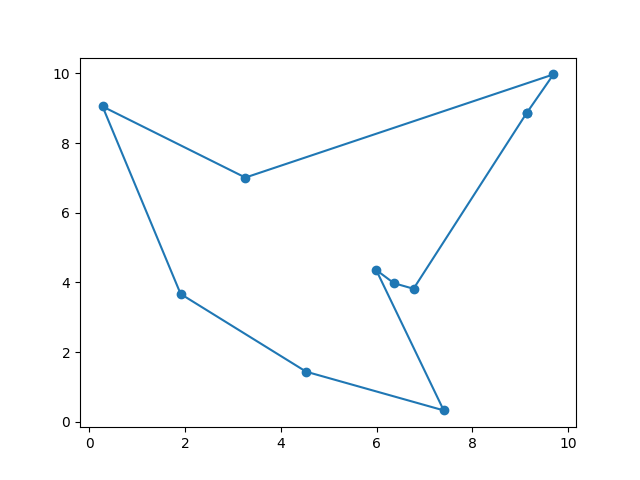

In [21]:
# Example Python input and plot
x_cities = np.array(x_coordinate)
y_cities = np.array(y_coordinate)
finalorder = best_path

# Rearrange for plotting
xplot = x_cities[finalorder] 
yplot = y_cities[finalorder]
xplot = np.append(xplot, xplot[0])
yplot = np.append(yplot, yplot[0])
plt.plot(xplot, yplot, 'o-')
plt.show()

In this section we are plotting the best path we obtained above.

We make the array of x and y coordinates and take the best path list. Then we chose the x and y coordinates in order and plot it.


# Travelling Salesman 100 cities

In [23]:
# Set up imports
%matplotlib ipympl
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import random

# Generating a random list of 100 numbers between 0,100
path = random.sample(range(0, 100), 100)
print(path)

[37, 8, 81, 43, 97, 59, 57, 36, 42, 3, 53, 61, 2, 32, 45, 33, 84, 54, 0, 67, 5, 16, 70, 27, 12, 13, 80, 20, 68, 91, 26, 52, 9, 85, 62, 51, 7, 69, 79, 46, 95, 1, 64, 25, 86, 22, 88, 83, 99, 28, 48, 14, 94, 73, 19, 82, 10, 29, 75, 31, 65, 76, 40, 63, 58, 41, 50, 30, 18, 4, 92, 47, 17, 66, 38, 39, 11, 34, 56, 35, 93, 78, 21, 74, 6, 71, 24, 15, 89, 77, 98, 96, 49, 60, 55, 90, 23, 44, 87, 72]


Here we first imports the necessary modules as numpy, matplotlib etc. 

Then we generate a radom list of 100 numbers using 'random.sample()' function. This sample we will use a first random path of travel which is further optimized using annealing algorithm to find the shortest path.


In [24]:
# Reading the text file
with open("TSP_100.txt","r") as f:
    data = f.read()

# conveting the string file to list 
lines = data.splitlines()

# generating the x_coordinate and y_coordinate from the file 
x_coordinate = []
y_coordinate = []

for i in range(1, len(lines)):
    x_coordinate.append(float(lines[i].split()[0]))        #appending the x_coordinate from text file
    y_coordinate.append(float(lines[i].split()[1]))        #appending the y_coordinate from text file

# creating a matrix containing the distance between each pair of cities 
distance_matrix = np.zeros((len(x_coordinate), len(x_coordinate)))
for i in range(len(x_coordinate)):
    for j in range(i, len(x_coordinate)):
        # distance finding using equlidian formula
        distance_matrix[i][j] = np.sqrt(((x_coordinate[i] - x_coordinate[j]) **2) + ((y_coordinate[i] - y_coordinate[j]) **2))
        distance_matrix[j][i] =  distance_matrix[i][j]


In this section of the code first we read the text file and split it's each line into an element of a list.

Then we find the x and y coordinates of the  cities from the text file. We first make two empty list then append the fist part of each element of the previously made list to x_coordinate list and the second part to the y_coordinate list.

Then we make a matrix which contains the distance from one city to another city. Here the [i][j] element and [j][i] element both refers to the distance between the ith and jth city. We use equlidian method of finding distance when the coordinates are given to find the distance between each pair of city. 

In [25]:
# generating function to find the total distance covered for each path
def get_distance(path, distance_matrix):
    distance = 0
    for i in range(len(path)-1):
        distance += distance_matrix[path[i]][path[i+1]]
    distance += distance_matrix[path[-1]][path[0]]
    return distance


In this section of code we define a function for finding the total distance travelled by a man if he travells through a path.

We give a path and the previously made distance_matrix as the argument to the function. Then we iterate len(path)-1 times that is we go to each city from the previoulsy mentioned city in the path and add the distance between two consecutively travelled cities. At last we add the distance between the last visited city and beginning city to make a loop.
This function returns the total distance travelled in the path.

In [28]:
# defining the temperature and cooling_rate for the annealing algorithm
temp = 3.0
cooling_rate = 0.95

current_path = path    # making a new variable current_path and assigning the randomly generated path to it

# applyin annealing algorithm 
for i in range(1000):
    current_cost = get_distance(current_path, distance_matrix)      # total distance travelled in current path
    best_path = current_path                                        # assigning the current path as best path
    best_cost = current_cost                                        # assigning the current cost as best cost
    
    # Generating a new path than the current path by swapping any two edges of the path randomly
    new_path = np.copy(current_path)
    p = random.randint(0,8)                                         # randomly generating a edge 
    q = random.randint(0,8)                                         # randomly generating a edge 
    new_path[p], new_path[q] = new_path[q], new_path[p]             # swapping the edges 
    
    
    # applying condition for finding best path 
    if(get_distance(new_path, distance_matrix) < best_cost):        # if distance less than the previous path
        current_path = new_path
    else:
        toss = np.random.random_sample()                            # if distance greater than the previous path
        if toss < np.exp(-(get_distance(new_path, distance_matrix) - best_cost)/temp): # if probability is more 
            current_path = new_path
        pass                                                                           # if probability is less 
    temp = temp * cooling_rate                                     # decreasing the temperature 

# finding best path and shortest distance
print(best_path)    
print(best_cost)
            

[ 8 43 81 37 59 97 57 42 36  3 53 61  2 32 45 33 84 54  0 67  5 16 70 27
 12 13 80 20 68 91 26 52  9 85 62 51  7 69 79 46 95  1 64 25 86 22 88 83
 99 28 48 14 94 73 19 82 10 29 75 31 65 76 40 63 58 41 50 30 18  4 92 47
 17 66 38 39 11 34 56 35 93 78 21 74  6 71 24 15 89 77 98 96 49 60 55 90
 23 44 87 72]
488.15169755347506


In this section we apply the annealing algorithm to find the best path.

Annealing is the algorithm using which we find the shortest path. Here first chose random path and when 'temperature' decreases our path is becoming more specific. And we get the corresponding shortest path. At the beginning the search is very random.

We first take the temperature and cooling_rate needed in the annealing algorithm. Then take the randomly generated path as current path. We find the distane travelled in this path and store it in current_cost variable. We update the best_cost and best_path with current_cost and current_path in each iteration.

We the take another path by just swapping any two random edges of the path. And find the new_path and the distance travelled in this path.
If the distance is less than the previouls path then we change the current_path with the new_path. 
If the distance is more and if the probabilty or temperature is high then we still change current_path with new_path and as the temperature decreases the probabily is less we pass the function.

In each iteration we change the temperature by multiplying it with the cooling_rate.
Then we get teh best_path and shortest_distance.

In this case for each time we run the best_path and the shortest distance will very alittle but will always be close to the actual shortest distance.

#### Observation
At the time of running the shortest distance is 488.15169755347506 and the best_path is [ 8 43 81 37 59 97 57 42 36  3 53 61  2 32 45 33 84 54  0 67  5 16 70 27
 12 13 80 20 68 91 26 52  9 85 62 51  7 69 79 46 95  1 64 25 86 22 88 83
 99 28 48 14 94 73 19 82 10 29 75 31 65 76 40 63 58 41 50 30 18  4 92 47
 17 66 38 39 11 34 56 35 93 78 21 74  6 71 24 15 89 77 98 96 49 60 55 90
 23 44 87 72].

By using other algorithms we can find more shorter path then we are getting by applying annealing algorithm.
We can say that what we are getting is the shortest path using annealing algorithm.

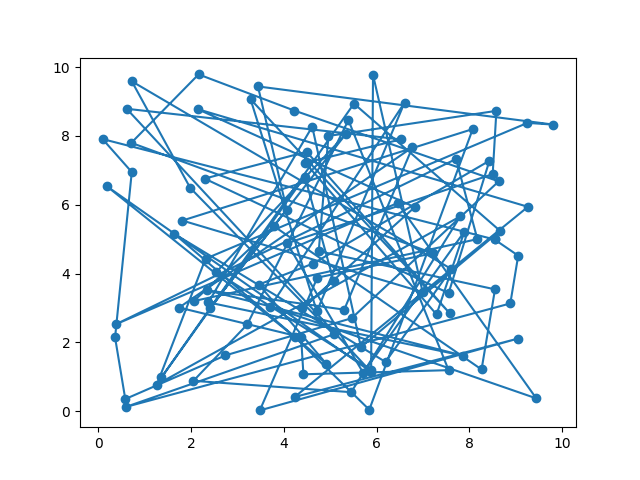

In [27]:
# Example Python input and plot
x_cities = np.array(x_coordinate)
y_cities = np.array(y_coordinate)
finalorder = best_path

# Rearrange for plotting
xplot = x_cities[finalorder] 
yplot = y_cities[finalorder]
xplot = np.append(xplot, xplot[0])
yplot = np.append(yplot, yplot[0])
plt.plot(xplot, yplot, 'o-')
plt.show()

In this section we are plotting the best path we obtained above.

We make the array of x and y coordinates and take the best path list. Then we chose the x and y coordinates in order and plot it.
